Topic: Challenge Set 6   
Subject: Linear Learning
Date: 01/29/2018  
Name: Laura Chen  
Worked with: N/A

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import *

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import patsy


%matplotlib inline

Challenge 1
Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)

In [137]:
n_samples = 100
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]

In [138]:
# Defining the underlying function
def f(x):
    return np.log(x)

# Generate the y values 
y = 1 + f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]

In [139]:
reg = LinearRegression()

poly = PolynomialFeatures(degree=2)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train=poly.fit_transform(X_train)
X_test=poly.transform(X_test)

In [140]:
reg.fit(X_train,y_train)
reg.score(X_test, y_test)

0.77957757437680897

In [141]:
# How to fit a logarithmic model?

Challenge 2
Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [148]:
n_samples = 100
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]

def f(x):
    return np.random.randn()*x+np.random.randn()*x**2.0

y= 1 + f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

reg = LinearRegression()
reg = reg.fit(X_train,y_train)
print('Training MSE: ' , mean_squared_error(y_train,reg.predict(X_train)), 'Testing MSE' , mean_squared_error(y_test,reg.predict(X_test)))

Training MSE:  0.0969960383174 Testing MSE 0.113870817097


Challenge 3
For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error
test error
R squared
AIC

In [150]:
train_err=[]
test_err=[]
r2=[]
aic=[]

degrees=np.linspace(0,7,8, dtype=int)

for degree in degrees:
    poly=PolynomialFeatures(degree=degree)
    X_pf=poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.33)
    reg=LinearRegression()
    
    
    reg.fit(X_train,y_train)
    train_err.append(mean_squared_error(y_train,reg.predict(X_train)))
    test_err.append(mean_squared_error(y_test,reg.predict(X_test)))
    r2.append(reg.score(X_test,y_test))
    aic_result = 2-2*np.log(sum((y_test - reg.predict(X_test))**2))
    aic.append(aic_result)

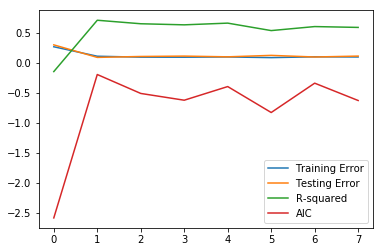

In [151]:
plt.plot(train_err, label = 'Training Error')
plt.plot(test_err, label = 'Testing Error')
plt.plot(r2, label = 'R-squared')
plt.plot(aic, label = 'AIC')
plt.legend()

Challenge 4
For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [168]:
train_err=[]
test_err=[]

for i in range (5,100,5):
    X_train = X[0:i]
    y_train = y[0:i]
    X_test = X[i:]
    y_test = y [i:]
    reg = LinearRegression()
    reg.fit(X_train,y_train)
    test_err.append(mean_squared_error(y_test,reg.predict(X_test)))
    train_err.append(mean_squared_error(y_train,reg.predict(X_train)))

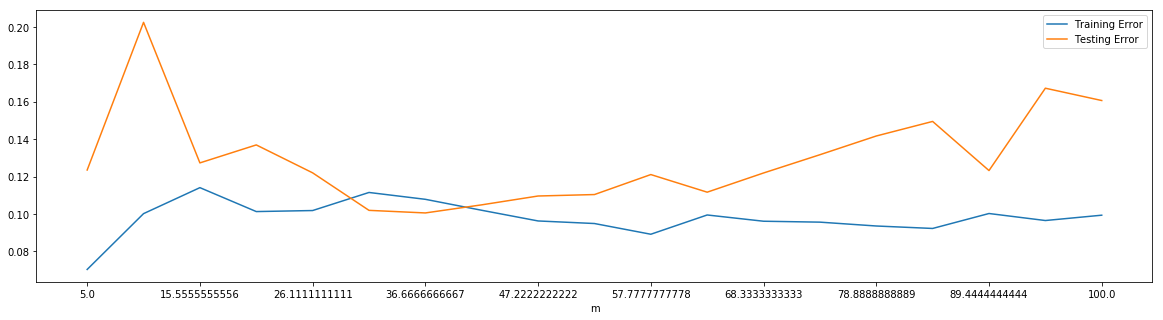

In [199]:
plt.figure(figsize=(20,5))
plt.plot(train_err, label = 'Training Error')
plt.plot(test_err, label = 'Testing Error')
plt.legend()
plt.xticks(np.arange(0,19,2),np.linspace(5,100,10))
plt.xlabel('m')